In [1]:
# Import Dependencies
import pandas as pd
import json
import requests
from pprint import pprint
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Import API key
from api_keys import api_key


In [2]:
headers = {'Authorization': 'Bearer %s' % api_key}

In [3]:
#search link on yelp
url='https://api.yelp.com/v3/businesses/search'

In [4]:
#running search through yelp and return the max results
data = []
count = 0
for offset in range(0, 1000, 50):
        params = {
            'limit': 50, 
            'location':'New York',
            'term': 'seabass',
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data += response.json()['businesses']
            count = count + 1
        elif response.status_code == 400:
            print('400 Bad Request')
            break
data

[{'id': 'WJS06XxRdc6DD1s4LWE9HA',
  'alias': 'fish-cheeks-new-york',
  'name': 'Fish Cheeks',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/pqupe3fe52869QQ23KkiBg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/fish-cheeks-new-york?adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=jNoG2_OHGxcce7ddjwUN_g',
  'review_count': 651,
  'categories': [{'alias': 'seafood', 'title': 'Seafood'},
   {'alias': 'thai', 'title': 'Thai'},
   {'alias': 'raw_food', 'title': 'Live/Raw Food'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.7258, 'longitude': -73.9927},
  'transactions': ['pickup', 'delivery'],
  'price': '$$',
  'location': {'address1': '55 Bond St',
   'address2': '',
   'address3': None,
   'city': 'New York',
   'zip_code': '10012',
   'country': 'US',
   'state': 'NY',
   'display_address': ['55 Bond St', 'New York, NY 10012']},
  'phone': '+12126772223',
  'display_phone': '(212) 677-2223',
  '

In [5]:
data[998]['url']

'https://www.yelp.com/biz/assaggini-di-roma-hazlet?adjust_creative=jNoG2_OHGxcce7ddjwUN_g&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=jNoG2_OHGxcce7ddjwUN_g'

In [6]:
#showing the results of the search in dataframe
df = pd.DataFrame(data)
df

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,fish-cheeks-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.7258, 'longitude': -73.9927}",(212) 677-2223,2258.772058,WJS06XxRdc6DD1s4LWE9HA,https://s3-media2.fl.yelpcdn.com/bphoto/pqupe3...,False,"{'address1': '55 Bond St', 'address2': '', 'ad...",Fish Cheeks,+12126772223,$$,4.5,651,"[pickup, delivery]",https://www.yelp.com/biz/fish-cheeks-new-york?...
1,kotobuki-manhattan-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.731107, 'longitude': -73.98912}",(212) 353-5088,2886.611028,HFn1sPqKSzvxaMk2n2ZtJw,https://s3-media4.fl.yelpcdn.com/bphoto/lUQa7h...,False,"{'address1': '56 3rd Ave', 'address2': None, '...",Kotobuki Manhattan,+12123535088,$$,4.0,623,"[pickup, delivery]",https://www.yelp.com/biz/kotobuki-manhattan-ne...
2,au-zaatar-new-york,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 40.728901, 'longitude': -73.981185}",(212) 254-5660,2832.520301,0FaLilJs2VN83hOEBcBnPg,https://s3-media1.fl.yelpcdn.com/bphoto/F1qi52...,False,"{'address1': '188 Avenue A', 'address2': '', '...",Au Za'atar,+12122545660,$$,4.0,873,"[pickup, delivery]",https://www.yelp.com/biz/au-zaatar-new-york?ad...
3,midtown-catch-new-york,"[{'alias': 'seafoodmarkets', 'title': 'Seafood...","{'latitude': 40.7582645924672, 'longitude': -7...",(646) 918-7560,6456.445759,LYwNv8P1oBSuWqEYaw7Wbg,https://s3-media1.fl.yelpcdn.com/bphoto/KHBuRB...,False,"{'address1': '405 E 57th St', 'address2': '', ...",Midtown Catch,+16469187560,$$,4.5,24,[],https://www.yelp.com/biz/midtown-catch-new-yor...
4,thai-villa-new-york-2,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...","{'latitude': 40.73902, 'longitude': -73.99065}",(212) 802-9999,3744.570400,B3_K2kUVbYOU0VaLcj_LTw,https://s3-media1.fl.yelpcdn.com/bphoto/OgCU9N...,False,"{'address1': '5 E 19th St', 'address2': 'G Flo...",Thai Villa,+12128029999,$$,4.5,3383,"[pickup, delivery]",https://www.yelp.com/biz/thai-villa-new-york-2...
5,the-seafire-grill-new-york-4,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.7547012104496, 'longitude': -7...",(212) 935-3785,5783.281476,ryvBsB9FrBBZDak87iGS1w,https://s3-media1.fl.yelpcdn.com/bphoto/Xfmipr...,False,"{'address1': '158 E 48th St', 'address2': None...",The Seafire Grill,+12129353785,$$$,4.5,1279,[],https://www.yelp.com/biz/the-seafire-grill-new...
6,extra-virgin-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.7353962496717, 'longitude': -7...",(212) 691-9359,3413.771056,KpBfFpjzsGvvqAzCasVW0g,https://s3-media1.fl.yelpcdn.com/bphoto/Idyk61...,False,"{'address1': '259 W 4th St', 'address2': '', '...",Extra Virgin,+12126919359,$$,3.5,1253,"[pickup, delivery]",https://www.yelp.com/biz/extra-virgin-new-york...
7,blacksea-fish-and-grill-rego-park,"[{'alias': 'mediterranean', 'title': 'Mediterr...","{'latitude': 40.7301, 'longitude': -73.863538}",(718) 275-7555,11355.700742,My17Ud2T_tXy_9ND9aezpQ,https://s3-media2.fl.yelpcdn.com/bphoto/bDKPNl...,False,"{'address1': '95-36 Queens Blvd', 'address2': ...",BlackSea Fish & Grill,+17182757555,$$$,4.0,346,"[pickup, delivery]",https://www.yelp.com/biz/blacksea-fish-and-gri...
8,seabra-marisqueira-newark,"[{'alias': 'portuguese', 'title': 'Portuguese'...","{'latitude': 40.72991, 'longitude': -74.16067}",(973) 465-1250,14283.696377,tCoC4QReUsoZKZvc1Ni5DA,https://s3-media3.fl.yelpcdn.com/bphoto/qnUZ43...,False,"{'address1': '87 Madison St', 'address2': '', ...",Seabra Marisqueira,+19734651250,$$,3.5,527,[delivery],https://www.yelp.com/biz/seabra-marisqueira-ne...
9,little-basil-new-york-5,"[{'alias': 'thai', 'title': 'Thai'}]","{'latitude': 40.741014, 'longitude': -73.982259}",(212) 689-1444,4083.052134,A_GbgtUSyGWpihHZOqMdwQ,https://s3-media3.fl.yelpcdn.com/bphoto/Ojn2dq...,False,"{'address1': '153 E 26th St', 'address2': '', ...",Little Basil,+12126891444,$$,4.0,498,"[pickup, del

In [7]:
df = df.drop(columns=['is_closed', 'transactions', 'distance', 'coordinates', 'phone', 'image_url'])

In [8]:
df

,alias,categories,display_phone,id,location,name,price,rating,review_count,url
0,fish-cheeks-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 677-2223,WJS06XxRdc6DD1s4LWE9HA,"{'address1': '55 Bond St', 'address2': '', 'ad...",Fish Cheeks,$$,4.5,651,https://www.yelp.com/biz/fish-cheeks-new-york?...
1,kotobuki-manhattan-new-york,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",(212) 353-5088,HFn1sPqKSzvxaMk2n2ZtJw,"{'address1': '56 3rd Ave', 'address2': None, '...",Kotobuki Manhattan,$$,4.0,623,https://www.yelp.com/biz/kotobuki-manhattan-ne...
2,au-zaatar-new-york,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",(212) 254-5660,0FaLilJs2VN83hOEBcBnPg,"{'address1': '188 Avenue A', 'address2': '', '...",Au Za'atar,$$,4.0,873,https://www.yelp.com/biz/au-zaatar-new-york?ad...
3,midtown-catch-new-york,"[{'alias': 'seafoodmarkets', 'title': 'Seafood...",(646) 918-7560,LYwNv8P1oBSuWqEYaw7Wbg,"{'address1': '405 E 57th St', 'address2': '', ...",Midtown Catch,$$,4.5,24,https://www.yelp.com/biz/midtown-catch-new-yor...
4,thai-villa-new-york-2,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",(212) 802-9999,B3_K2kUVbYOU0VaLcj_LTw,"{'address1': '5 E 19th St', 'address2': 'G Flo...",Thai Villa,$$,4.5,3383,https://www.yelp.com/biz/thai-villa-new-york-2...
5,the-seafire-grill-new-york-4,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 935-3785,ryvBsB9FrBBZDak87iGS1w,"{'address1': '158 E 48th St', 'address2': None...",The Seafire Grill,$$$,4.5,1279,https://www.yelp.com/biz/the-seafire-grill-new...
6,extra-virgin-new-york,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",(212) 691-9359,KpBfFpjzsGvvqAzCasVW0g,"{'address1': '259 W 4th St', 'address2': '', '...",Extra Virgin,$$,3.5,1253,https://www.yelp.com/biz/extra-virgin-new-york...
7,blacksea-fish-and-grill-rego-park,"[{'alias': 'mediterranean', 'title': 'Mediterr...",(718) 275-7555,My17Ud2T_tXy_9ND9aezpQ,"{'address1': '95-36 Queens Blvd', 'address2': ...",BlackSea Fish & Grill,$$$,4.0,346,https://www.yelp.com/biz/blacksea-fish-and-gri...
8,seabra-marisqueira-newark,"[{'alias': 'portuguese', 'title': 'Portuguese'...",(973) 465-1250,tCoC4QReUsoZKZvc1Ni5DA,"{'address1': '87 Madison St', 'address2': '', ...",Seabra Marisqueira,$$,3.5,527,https://www.yelp.com/biz/seabra-marisqueira-ne...
9,little-basil-new-york-5,"[{'alias': 'thai', 'title': 'Thai'}]",(212) 689-1444,A_GbgtUSyGWpihHZOqMdwQ,"{'address1': '153 E 26th St', 'address2': '', ...",Little Basil,$$,4.0,498,https://www.yelp.com/biz/little-basil-new-york...


In [9]:
#df.to_csv (r'C:\Users\leroy\Desktop\cleandatayelp.csv', index = True, header=True)

In [30]:
#testing
df.location[1]["display_address"]

['56 3rd Ave', 'New York, NY 10003']

In [31]:
df.categories[1]

[{'alias': 'japanese', 'title': 'Japanese'},
 {'alias': 'sushi', 'title': 'Sushi Bars'},
 {'alias': 'seafood', 'title': 'Seafood'}]

In [32]:
df.categories[0][0]["alias"]

'seafood'

In [33]:
df.categories[0][0]["title"]

'Seafood'

In [34]:
df.categories[1][0]["title"]

'Japanese'

In [35]:
df.categories[2][0]["title"]

'Wine Bars'

In [36]:
#drop null data values- price seems to be missing
#---
df.drop('price', axis=1)
df = df.dropna(axis=0)
df = df.reset_index(drop=True)

In [37]:
df.shape
len(df)

941

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 10 columns):
alias            941 non-null object
categories       941 non-null object
display_phone    941 non-null object
id               941 non-null object
location         941 non-null object
name             941 non-null object
price            941 non-null object
rating           941 non-null float64
review_count     941 non-null int64
url              941 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 73.6+ KB


In [39]:
#split link
df[['new_url2', 'new_url3']]=df['url'].str.split('?', expand=True,n=2)

In [40]:
df['new_url2']

0          https://www.yelp.com/biz/fish-cheeks-new-york
1      https://www.yelp.com/biz/kotobuki-manhattan-ne...
2            https://www.yelp.com/biz/au-zaatar-new-york
3        https://www.yelp.com/biz/midtown-catch-new-york
4         https://www.yelp.com/biz/thai-villa-new-york-2
5      https://www.yelp.com/biz/the-seafire-grill-new...
6         https://www.yelp.com/biz/extra-virgin-new-york
7      https://www.yelp.com/biz/blacksea-fish-and-gri...
8      https://www.yelp.com/biz/seabra-marisqueira-ne...
9       https://www.yelp.com/biz/little-basil-new-york-5
10     https://www.yelp.com/biz/taverna-kyclades-east...
11             https://www.yelp.com/biz/okonomi-brooklyn
12     https://www.yelp.com/biz/marc-forgione-new-york-2
13     https://www.yelp.com/biz/petite-crevette-brooklyn
14     https://www.yelp.com/biz/cornerstone-cafe-new-...
15               https://www.yelp.com/biz/nerai-new-york
16         https://www.yelp.com/biz/seamores-new-york-14
17           https://www.yelp.c

In [41]:
df['new_url2'] = df['new_url2'] + '?'

In [42]:
#creating a dummy new column
df["New_Category"] = df.categories

In [43]:
#creating a dummy new column
df["New_zip_code"] = df.location

In [44]:
#creating a dummy new column
df["new_ID"] = df["id"]


In [45]:
#creating a dummy new column
df["URL"] = df["new_url2"]

In [46]:
#creating a dummy new column
df["Updated_city"] = df.location

In [47]:
df.location[1]["city"]

'New York'

In [48]:
df.location[1]["zip_code"]

'10003'

In [49]:
#creating a new dummy column for city, zip code, and food category
counting = 0
for k in range(0,len(df)):
    df["New_Category"][k] = df.categories[k][0]["title"]
    df["Updated_city"][k] = df.location[k]["city"]
    df["New_zip_code"][k] = df.location[k]["zip_code"] 
    #df["URL"][k] = df['URL'][k] + "?"
    #df["URL"][k] = df["new_url2"][k] + "?"
    #print("No:" + str(counting))
    #print("URL:", df.URL[k])
    #print("\n")
    #counting = counting + 1

C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\leroy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
df["Updated_city"]

0              New York
1              New York
2              New York
3              New York
4              New York
5              New York
6              New York
7             Rego Park
8                Newark
9              New York
10             New York
11             Brooklyn
12             New York
13             Brooklyn
14             New York
15             New York
16             New York
17             New York
18              Bayside
19             New York
20             New York
21             New York
22             New York
23              Astoria
24     Long Island City
25             New York
26             New York
27             Brooklyn
28             Flushing
29        Staten Island
             ...       
911            New York
912            New York
913             Hoboken
914            New York
915              Edison
916            Brooklyn
917            Millburn
918      Cliffside Park
919            New York
920              Newark
921            N

In [51]:
df["New_Category"]

0              Seafood
1             Japanese
2            Wine Bars
3      Seafood Markets
4                 Thai
5              Seafood
6              Seafood
7        Mediterranean
8           Portuguese
9                 Thai
10               Greek
11            Japanese
12      American (New)
13             Seafood
14             Italian
15               Greek
16             Seafood
17              French
18             Seafood
19             Italian
20      Latin American
21             Seafood
22          Sushi Bars
23               Greek
24             Seafood
25         Steakhouses
26              Diners
27             Italian
28              Korean
29            Bakeries
            ...       
911           Japanese
912            Italian
913         Sushi Bars
914     American (New)
915     American (New)
916              Greek
917           Japanese
918            Italian
919          Wine Bars
920            Spanish
921          Brazilian
922      Cocktail Bars
923        

In [52]:
df['URL']

0         https://www.yelp.com/biz/fish-cheeks-new-york?
1      https://www.yelp.com/biz/kotobuki-manhattan-ne...
2           https://www.yelp.com/biz/au-zaatar-new-york?
3       https://www.yelp.com/biz/midtown-catch-new-york?
4        https://www.yelp.com/biz/thai-villa-new-york-2?
5      https://www.yelp.com/biz/the-seafire-grill-new...
6        https://www.yelp.com/biz/extra-virgin-new-york?
7      https://www.yelp.com/biz/blacksea-fish-and-gri...
8      https://www.yelp.com/biz/seabra-marisqueira-ne...
9      https://www.yelp.com/biz/little-basil-new-york-5?
10     https://www.yelp.com/biz/taverna-kyclades-east...
11            https://www.yelp.com/biz/okonomi-brooklyn?
12     https://www.yelp.com/biz/marc-forgione-new-yor...
13     https://www.yelp.com/biz/petite-crevette-brook...
14     https://www.yelp.com/biz/cornerstone-cafe-new-...
15              https://www.yelp.com/biz/nerai-new-york?
16        https://www.yelp.com/biz/seamores-new-york-14?
17          https://www.yelp.co

In [53]:
# Create new table under df_graph

df_graph = df[["name", "new_ID","URL","New_Category", "price", "rating",
                           "Updated_city", "review_count","location","New_zip_code"]]

df_graph.index.name = 'Index'
df_graph.head(5)

,name,new_ID,URL,New_Category,price,rating,Updated_city,review_count,location,New_zip_code
Index,,,,,,,,,,
0,Fish Cheeks,WJS06XxRdc6DD1s4LWE9HA,https://www.yelp.com/biz/fish-cheeks-new-york?,Seafood,$$,4.5,New York,651,"{'address1': '55 Bond St', 'address2': '', 'ad...",10012
1,Kotobuki Manhattan,HFn1sPqKSzvxaMk2n2ZtJw,https://www.yelp.com/biz/kotobuki-manhattan-ne...,Japanese,$$,4.0,New York,623,"{'address1': '56 3rd Ave', 'address2': None, '...",10003
2,Au Za'atar,0FaLilJs2VN83hOEBcBnPg,https://www.yelp.com/biz/au-zaatar-new-york?,Wine Bars,$$,4.0,New York,873,"{'address1': '188 Avenue A', 'address2': '', '...",10009
3,Midtown Catch,LYwNv8P1oBSuWqEYaw7Wbg,https://www.yelp.com/biz/midtown-catch-new-york?,Seafood Markets,$$,4.5,New York,24,"{'address1': '405 E 57th St', 'address2': '', ...",10022
4,Thai Villa,B3_K2kUVbYOU0VaLcj_LTw,https://www.yelp.com/biz/thai-villa-new-york-2?,Thai,$$,4.5,New York,3383,"{'address1': '5 E 19th St', 'address2': 'G Flo...",10003


In [54]:
# grouped = us_restaurants.city.value_counts()[:10]


new_cat = df_graph["New_Category"].value_counts()[:10]
new_cat.head()

Italian           148
Japanese          122
Sushi Bars         76
American (New)     75
Seafood            63
Name: New_Category, dtype: int64

In [55]:
new_cat[3]

75

In [56]:
rat_group = df_graph.groupby('rating')
rat_group

In [57]:
rat_cat_group = rat_group['rating'].count()
rat_cat_group.head

<bound method NDFrame.head of rating
1.5      1
2.0      1
2.5     12
3.0     68
3.5    261
4.0    466
4.5    127
5.0      5
Name: rating, dtype: int64>

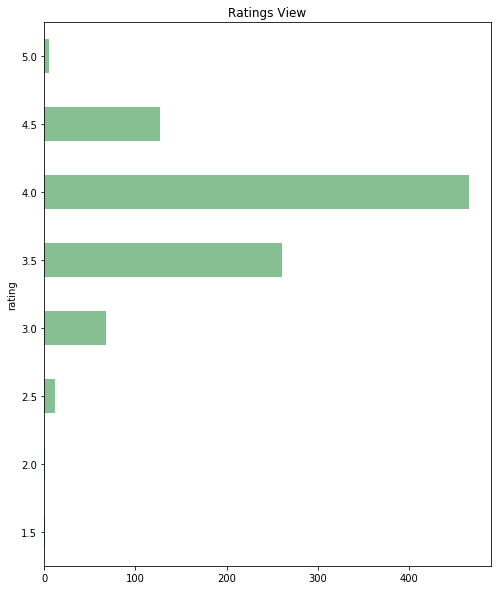

In [58]:
rate_chart = rat_cat_group.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=-1, width=0.5, title='Ratings View')

In [59]:
cat_group = df_graph.groupby('New_Category')

In [60]:
count_cat_group = cat_group['New_Category'].count().sort_values(ascending = False)[:10]
count_cat_group.head(5)

New_Category
Italian           148
Japanese          122
Sushi Bars         76
American (New)     75
Seafood            63
Name: New_Category, dtype: int64

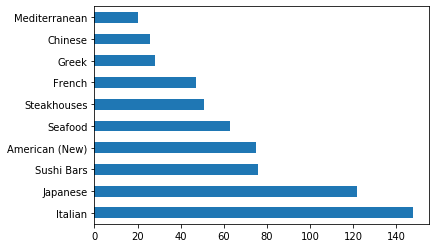

In [61]:
count_chart= new_cat.plot(kind='barh')    

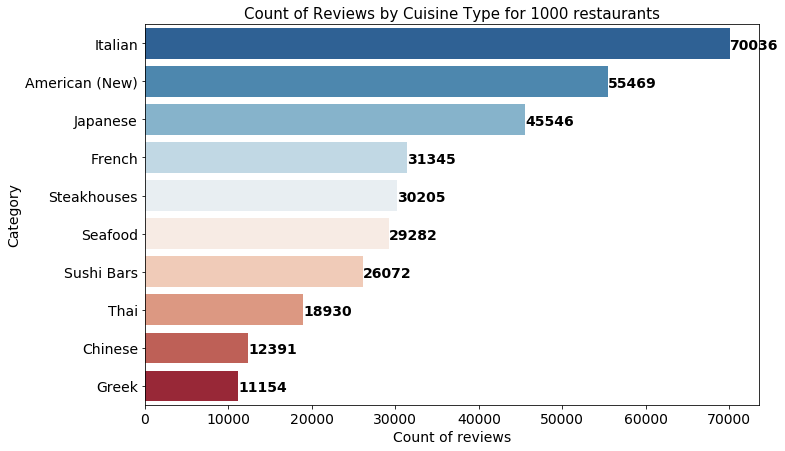

In [62]:
plt.figure(figsize=(11,7))
grouped = df_graph.groupby('New_Category')['review_count'].sum().sort_values(ascending = False)[:10]
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdBu_r", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type for 1000 restaurants', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

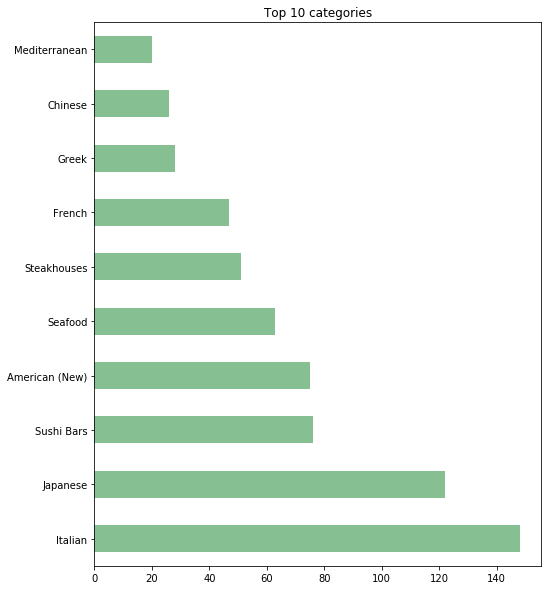

In [63]:
count_chart = new_cat.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=-1, width=0.5, title='Top 10 categories')

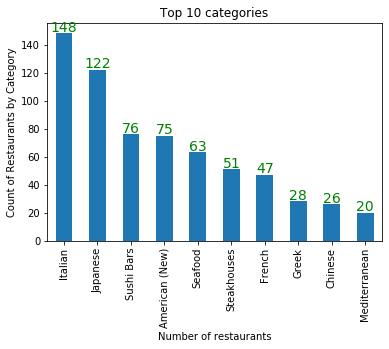

<Figure size 432x288 with 0 Axes>

In [64]:
# Create a bar chart based off of the group series from before
count_chart = new_cat.plot(kind='bar', title='Top 10 categories')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Number of restaurants")
count_chart.set_ylabel("Count of Restaurants by Category")
for index,data in enumerate(new_cat):
    plt.text(x=index, y =data+4, s=f"{data}", horizontalalignment ='center',color='green', fontdict=dict(fontsize=14), va='center')
plt.show()
plt.tight_layout()




In [65]:
df_graph

,name,new_ID,URL,New_Category,price,rating,Updated_city,review_count,location,New_zip_code
Index,,,,,,,,,,
0,Fish Cheeks,WJS06XxRdc6DD1s4LWE9HA,https://www.yelp.com/biz/fish-cheeks-new-york?,Seafood,$$,4.5,New York,651,"{'address1': '55 Bond St', 'address2': '', 'ad...",10012
1,Kotobuki Manhattan,HFn1sPqKSzvxaMk2n2ZtJw,https://www.yelp.com/biz/kotobuki-manhattan-ne...,Japanese,$$,4.0,New York,623,"{'address1': '56 3rd Ave', 'address2': None, '...",10003
2,Au Za'atar,0FaLilJs2VN83hOEBcBnPg,https://www.yelp.com/biz/au-zaatar-new-york?,Wine Bars,$$,4.0,New York,873,"{'address1': '188 Avenue A', 'address2': '', '...",10009
3,Midtown Catch,LYwNv8P1oBSuWqEYaw7Wbg,https://www.yelp.com/biz/midtown-catch-new-york?,Seafood Markets,$$,4.5,New York,24,"{'address1': '405 E 57th St', 'address2': '', ...",10022
4,Thai Villa,B3_K2kUVbYOU0VaLcj_LTw,https://www.yelp.com/biz/thai-villa-new-york-2?,Thai,$$,4.5,New York,3383,"{'address1': '5 E 19th St', 'address2': 'G Flo...",10003
5,The Seafire Grill,ryvBsB9FrBBZDak87iGS1w,https://www.yelp.com/biz/the-seafire-grill-new...,Seafood,$$$,4.5,New York,1279,"{'address1': '158 E 48th St', 'address2': None...",10017
6,Extra Virgin,KpBfFpjzsGvvqAzCasVW0g,https://www.yelp.com/biz/extra-virgin-new-york?,Seafood,$$,3.5,New York,1253,"{'address1': '259 W 4th St', 'address2': '', '...",10014
7,BlackSea Fish & Grill,My17Ud2T_tXy_9ND9aezpQ,https://www.yelp.com/biz/blacksea-fish-and-gri...,Mediterranean,$$$,4.0,Rego Park,346,"{'address1': '95-36 Queens Blvd', 'address2': ...",11374
8,Seabra Marisqueira,tCoC4QReUsoZKZvc1Ni5DA,https://www.yelp.com/biz/seabra-marisqueira-ne...,Portuguese,$$,3.5,Newark,527,"{'address1': '87 Madison St', 'address2': '', ...",07105


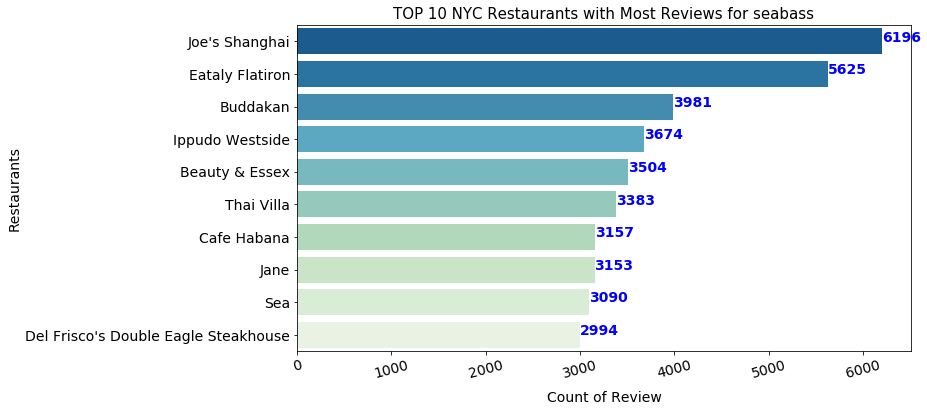

In [66]:
# TOP 10 Restaurants with Most Reviews
plt.figure(figsize=(11,6))
grouped = df_graph[['name','review_count']].sort_values(by='review_count', ascending=False)[:10]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 NYC Restaurants with Most Reviews for seabass', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', color='blue', fontsize=14)

In [67]:
plt.style.use('ggplot')

  New_zip_code  review_count
0        10019         37858
1        10036         34163
2        10003         32704
3        10012         26094
4        10014         25943
5        10011         24400
6        10013         24291
7        10022         17846
8        10017         14845
9        10010         13646


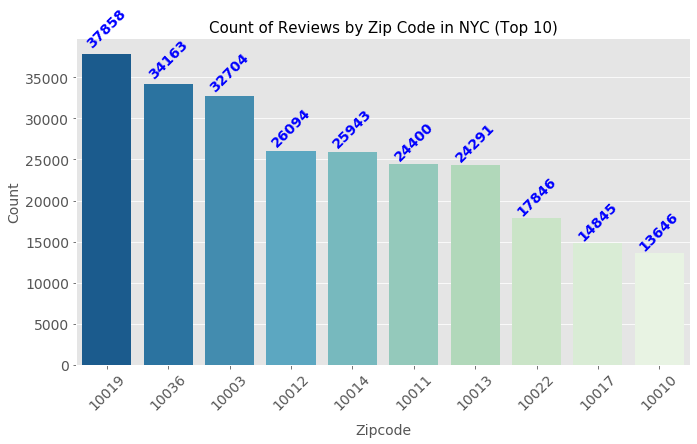

In [68]:
plt.figure(figsize=(11,6))


grouped = df_graph.groupby('New_zip_code')['review_count'].sum().sort_values(ascending=False)[:10]
grouped_df = pd.DataFrame(grouped.reset_index())
print(grouped_df)
grouped_df.columns =["New_zip_code","review_count"]

grouped_df = grouped_df.sort_values(['review_count'],ascending=False).reset_index(drop=True)


ax = sns.barplot(grouped_df.index, grouped_df.review_count,palette=sns.color_palette("GnBu_r", len(grouped_df))) 
plt.xlabel('Zipcode', labelpad=10, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by Zip Code in NYC (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',color='blue',rotation=45,fontweight='bold', fontsize=14)
    

ax.set_xticklabels(grouped_df.New_zip_code)
for item in ax.get_xticklabels(): item.set_rotation(45)


    

In [ ]:
df

In [ ]:
# label reviews as positive or negative
df['labels'] = ''
df.loc[df.rating >=4, 'labels'] = 'positive'
df.loc[df.rating ==3, 'labels'] = 'neural'
df.loc[df.rating <3, 'labels'] = 'negative'

# drop neutral reviews for easy analysis
df.drop(df[df['labels'] =='neural'].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

In [ ]:
# Calculate the earliest/latest year a book was published
least_rev = df_graph["review_count"].min()
most_rev = df_graph["review_count"].max()

In [ ]:
top_reviews = df_graph.nlargest(5,['review_count'])

In [ ]:
top_reviews

In [ ]:
#Top 3 most reviews resturants based on search terms'seabass'
top_reviews['URL'].iloc[0]
top_reviews['URL'].iloc[1]
top_reviews['URL'].iloc[2]
top_reviews['URL'].iloc[3]
top_reviews['URL'].iloc[4]

In [ ]:
#Top 3 recommended resturants based on search terms 'seabass'
df_graph['URL'].loc[0] # fish-cheeks
df_graph['URL'].loc[1] # kotobuki
df_graph['URL'].loc[2] # midtown catch
df_graph['URL'].loc[3] # au-zaata
df_graph['URL'].loc[4] # thai-villa

In [ ]:
df_graph['URL'].loc[2]

In [ ]:
#------------------------------------------------------------
#Searching for Top 3 resturants on the word frequency

In [ ]:
#Importing packages, Dependencies
from selenium import webdriver
from splinter import Browser
import urllib
from bs4 import BeautifulSoup
import time
import requests
import json
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
# importing module for regex 
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())

In [ ]:
# URL of page to be scraped
url_top1 = top_reviews['URL'].iloc[0]
url_top2 = top_reviews['URL'].iloc[1]
url_top3 = top_reviews['URL'].iloc[2]
url_top4 = top_reviews['URL'].iloc[3]
url_top5 = top_reviews['URL'].iloc[4]

url_rec1 = df_graph['URL'].loc[0]
url_rec2 = df_graph['URL'].loc[1]
url_rec3 = df_graph['URL'].loc[2]
url_rec4 = df_graph['URL'].loc[3]
url_rec5 = df_graph['URL'].loc[4]

url_rec3

In [ ]:
# Retrieve page with the requests module
#response = requests.get(url_top1)
response = requests.get(url_rec3)

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
#Seabass
#url_top1
#url_top2
#url_top3
#url_rec1
#url_rec2
url_rec3


start = 0
num_pages = 7
end = 20* num_pages
x = 1
reviews = []
quote_add = []

while (start < end):
    try:
        new_url = url_rec3 + 'start=' + str(start)
        start +=20
        print (new_url)
        response = requests.get(new_url)
        soup = BeautifulSoup(response.text, "html.parser")
    #print(soup.prettify())
    #instructions = recipeSoup.find('div', class_='hidden').text
    #right_table4=soup.find_all('p', itemprop='description')
        quotes = soup.find_all('span', class_ = 'lemon--span__373c0__3997G raw__373c0__3rKqk')
        for quote in quotes:
            x = x+1
            print('Review:', x, '-------------')
            print(quote.text)
            quote_add.append(quote.text)
#-------------------------------------------------------------------newly added
#Makes all the letters lower in reviews
            review = quote.text.lower()
#expandContractions will put the dictionary made earlier to replace the contractions in the reviews
#Make sure to to run the cList dict cell or else there will be an error
            expandContractions(review)
#Cleaning the lemmas or words in reviews now will make it easier when we start predictive modeling
            words = word_tokenize(review)
            words = word_tokenize(review.replace('\n',' '))
            clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
            characters_to_remove = ["''",'``','...']
            clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
            english_stops = set(stopwords.words('english'))
            clean_words = [word for word in clean_words if word not in english_stops]
            wordnet_lemmatizer = WordNetLemmatizer()
            lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
            #lemma_list = str.replace(right_table4.get_text(strip=True),". ",".")
            reviews.append(lemma_list)
    #reviews.add(a)
    except:
    #reviews.append(right_table4)
        time.sleep(5)
    #print("Reviews:", a,"\n")
        page = urllib.request.urlopen(url)
        soup = BeautifulSoup(page)


In [ ]:
#uncleaned
reviews_collect = pd.DataFrame(quote_add, columns=['reviews'])
reviews_collect.head()

In [ ]:
#saving reviews to csv
reviews_collect.to_csv (r'C:\Users\leroy\Desktop\reviews6.csv', index = True, header=True)

In [ ]:
reviews_collect

In [ ]:
reviews

In [ ]:
quote_add

In [ ]:
#cleaned
reviews_collect_cleaned = pd.DataFrame(np.array(reviews), columns=['review'])
reviews_collect_cleaned.head()

In [ ]:
from collections import defaultdict
word_name = []
y = 0

word_freq = defaultdict(int)

for text in quote_add:
    text = text.lower()
    
    text = text.replace(',', '')
    text = text.replace('.', '')
    text = text.replace('-', '')
    text = text.replace('/', '')
    text = text.replace('?', '')
    text = text.replace(')', '')
    text = text.replace('(', '')
    text = text.replace('!!', '')
    text = text.replace('"', '')
    text = text.replace('!', '')
    text = text.replace('', '')
    text = text.replace(':', '')
    text = text.replace(';', '')
    #cleaning
    #try:
          #method = str.replace(text.get_text(strip=True),". ","")
          #method = str.replace(method, ". ", ".")
          #method = str.replace(method, ".",".\n")
          #method = str.replace(method,", ","") 
        
    print(text)  
    #except AttributeError:
          #print("exit")
    for word in text.split():
        if word == "here":
            word = word.replace('here','')
        if word == "came":
            word = word.replace('came','')
        if word == "would":
            word = word.replace('would','')    
        if word == "go":
            word = word.replace('go','')
        if word == "out":
            word = word.replace('out','')
        if word == "by":
            word = word.replace('by','')    
        if word == "our":
            word = word.replace('our','')
        if word == "from":
            word = word.replace('from','')
        if word == "some":
            word = word.replace('some','')
        if word == "us":
            word = word.replace('us','')
        if word == "or":
            word = word.replace('or','')    
        if word == "can":
            word = word.replace('can','')    
        if word == "all":
            word = word.replace('all','')
        if word == "your":
            word = word.replace('your','')
        if word == "also":
            word = word.replace('also','')
        if word == "it's":
            word = word.replace("it's",'')    
        if word == "only":
            word = word.replace('only','')
        if word == "there":
            word = word.replace('there','')
        if word == "their":
            word = word.replace('their','')
        if word == "get":
            word = word.replace('get','')
        if word == "other":
            word = word.replace('other','')    
        if word == "a":
            word = word.replace('a','')
        if word == "to":
            word = word.replace('to','')
        if word == "i":
            word = word.replace('i','')
        if word == "of":
            word = word.replace('of','')
        if word == "is":
            word = word.replace('is','')
        if word == "was":
            word = word.replace('was','')
        if word == "in":
            word = word.replace('in','')
        if word == "for":
            word = word.replace('for','')
        if word == "it":
            word = word.replace('it','')
        if word == "with":
            word = word.replace('with','')
        if word == "when":
            word = word.replace('when','')
        if word == "which":
            word = word.replace('which','')
        if word == "just":
            word = word.replace('just','')    
        if word == "you":
            word = word.replace('you','')
        if word == "we":
            word = word.replace('we','')
        if word == "but":
            word = word.replace('but','')            
        if word == "this":
            word = word.replace('this','')
        if word == "that":
            word = word.replace('that','')
        if word == "be":
            word = word.replace('be','')
        if word == "my":
            word = word.replace('my','')    
        if word == "have":
            word = word.replace('have','')
        if word == "if":
            word = word.replace('if','')
        if word == "at":
            word = word.replace('at','')    
        if word == "had":
            word = word.replace('had','')    
        if word == "and":    
            word = word.replace('and', '')
        if word == "come":    
            word = word.replace('come', '')
        if word == "got":    
            word = word.replace('got', '')    
        if word == "the":        
            word = word.replace('the', '')
        if word == "as":        
            word = word.replace('as', '')    
        if word == "they":        
            word = word.replace('they', '')
        if word == "are":        
            word = word.replace('are', '')
        if word == "on":        
            word = word.replace('on', '')
        if word == "so":        
            word = word.replace('so', '')
        if word == "were":        
            word = word.replace('were', '')    
        if word == "dumpling":        
            word = word.replace("dumpling", "dumplings")
        if word == "dumplingss":        
            word = word.replace("dumplingss", "dumplings")
        if word != '':    
            word_freq[word] += 1
        #word_name.append(word)
        #word_freq['test'] = word_freq['test'].append(word)
        #word_name = word_name.append(word)
        y = y+1
        print('Word Counting:', y, '-------------')
        print(word)
        #word_name.append(word)

word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'Word_freq'}) \

word_freq_df.index.name = 'Word'

In [ ]:
#temp saving
word_freq_df.to_csv (r'C:\Users\leroy\Desktop\seabassyelpmostrecom3.csv', index = True, header=True)

In [10]:
from sqlalchemy import create_engine
# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import MetaData
Base = declarative_base()

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 



#Connect to local database
rds_connection_string = "postgres:2305nseW@localhost:5432/yelp_review_db"
engine = create_engine(f'postgresql://{rds_connection_string}')
conn = engine.connect()

In [11]:
engine.table_names()

['sb_yelpmostrecomm1',
 'sb_top_reviews3',
 'sb_yelp_mostrecomm2',
 'sb_yelp_mostrecomm3',
 'new2_sb_EatalyFlatiron_db',
 'new3_sb_IppudoWestside_db',
 'new1_sb_shanghaijoe_db',
 'sb_top_reviews1',
 'sb_top_reviews2',
 'toprevframes']

In [ ]:
#Use pandas to load csv converted DataFrame into database
#new_customer_data_df.to_sql(name='Yelp_reviews_seabass', con=engine, if_exists='append', index=False)

In [12]:
#Confirm data has been added by querying the customer_name table top 20 words mentioned

new1_sb_shanghaijoe_db = pd.read_sql_query('select * from sb_top_reviews1', con=engine).head(20)

In [13]:
new2_sb_EatalyFlatiron_db = pd.read_sql_query('select * from sb_top_reviews2', con=engine).head(20)

In [14]:
new3_sb_IppudoWestside_db = pd.read_sql_query('select * from sb_top_reviews3', con=engine).head(20)

In [ ]:
#drop common words to satify top 20 words relating to food

In [ ]:
#to_drop = ['the', 'and', ]
#new1_seabass_shanghaijoe_db[~new1_seabass_shanghaijoe_db['word'].isin(to_drop)]

In [15]:
new1_sb_shanghaijoe_db['id'] = ''

In [16]:
new1_sb_shanghaijoe_db.head()

,word,word_freq,id
0,dumplings,360,
1,soup,304,
2,not,152,
3,good,119,
4,pork,118,


In [17]:
#new1_sb_shanghaijoe_db.astype({'id': 'int64'}).dtypes

In [18]:
new2_sb_EatalyFlatiron_db['id'] = ""

In [19]:
new2_sb_EatalyFlatiron_db.head()

,word,word_freq,id
0,place,111,
1,food,84,
2,pasta,83,
3,not,81,
4,eataly,79,


In [20]:
new3_sb_IppudoWestside_db['id'] = ''

In [21]:
new3_sb_IppudoWestside_db.head()

,word,word_freq,id
0,ramen,314,
1,not,124,
2,good,122,
3,broth,111,
4,ippudo,107,


In [22]:
new2_sb_EatalyFlatiron_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
word         20 non-null object
word_freq    20 non-null int64
id           20 non-null object
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


In [23]:
new2_sb_EatalyFlatiron_db

,word,word_freq,id
0,place,111,
1,food,84,
2,pasta,83,
3,not,81,
4,eataly,79,
5,good,74,
6,italian,74,
7,one,59,
8,great,56,
9,time,51,


In [24]:
new3_sb_IppudoWestside_db

,word,word_freq,id
0,ramen,314,
1,not,124,
2,good,122,
3,broth,111,
4,ippudo,107,
5,pork,101,
6,wait,97,
7,place,88,
8,noodles,87,
9,very,87,


In [25]:
#Combing all 3 dataframes and placing unique Id on the word
frames = [new1_sb_shanghaijoe_db, new2_sb_EatalyFlatiron_db, new3_sb_IppudoWestside_db]

result = pd.concat(frames).reset_index(drop=True) #resetting the indexes


In [26]:
result['id'] = ''

In [27]:
result['id'] = result.groupby(['word']).ngroup()

In [28]:
toprevframes = result

In [29]:
#switching varible
toprevframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
word         60 non-null object
word_freq    60 non-null int64
id           60 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [ ]:
#creating a unique id column for word between top reviews 1st and 2nd
zcounter = 0
for z in range(0,len(result)):
    for y in range(0,len(new2_sb_EatalyFlatiron_db)):
        if result['word'][z] == new2_sb_EatalyFlatiron_db['word'][y]:
            new2_sb_EatalyFlatiron_db['id'][y] = result['id'][z]
            #print ("found " + str(new2_sb_EatalyFlatiron_db['id'][z]))
        if result['word'][z] == new1_sb_shanghaijoe_db['word'][y]:
            new1_sb_shanghaijoe_db['id'][y] = result['id'][z]    
        if result['word'][z] == new3_sb_IppudoWestside_db['word'][y]:
            new3_sb_IppudoWestside_db['id'][y] = result['id'][z]
            #print ("found " + str(new3_sb_IppudoWestside_db['id'][z]))
                       

    for w in range(0,len(new1_sb_shanghaijoe_db)):        
        if result['word'][z] == new2_sb_EatalyFlatiron_db['word'][w]:
            new2_sb_EatalyFlatiron_db['id'][w] = result['id'][z]
            #print ("found " + str(new2_sb_EatalyFlatiron_db['id'][z]))
        if result['word'][z] == new1_sb_shanghaijoe_db['word'][w]:
            new1_sb_shanghaijoe_db['id'][w] = result['id'][z]    
        if result['word'][z] == new3_sb_IppudoWestside_db['word'][w]:
            new3_sb_IppudoWestside_db['id'][w] = result['id'][z]
            #print ("found " + str(new3_sb_IppudoWestside_db['id'][z]))
            
#     for y in range(0,len(new3_sb_IppudoWestside_db)):
#         if result['word'][z] == new3_sb_IppudoWestside_db['word'][y]:
#             new3_sb_IppudoWestside_db['id'][y] = result['id'][z]
#             print ("found " + str(new3_sb_IppudoWestside_db['id'][z]))
#             break
        
        
        
        #if new2_sb_EatalyFlatiron_db['word'][y] != new1_sb_shanghaijoe_db['word'][z]:
        #    print ("putting in new " + str(y))
            #new2_sb_EatalyFlatiron_db['id'][y] =  new2_sb_EatalyFlatiron_db['id'][y] + str(20 + zcounter)
            #zcounter = zcounter + 1
            #print ("not found " + str(new2_sb_EatalyFlatiron_db['id'][z]))
        #else:
        #    print ("error")
   

    
#this code works    


In [ ]:
new2_sb_EatalyFlatiron_db.head()

In [ ]:
new1_sb_shanghaijoe_db.info()

In [ ]:
new2_sb_EatalyFlatiron_db.info()

In [ ]:
new3_sb_IppudoWestside_db

In [ ]:
#converting object to int for id column
new1_sb_shanghaijoe_db["id"] = new1_sb_shanghaijoe_db["id"].astype(str).astype(int)

#converting object to int for id column
new2_sb_EatalyFlatiron_db["id"] = new2_sb_EatalyFlatiron_db["id"].astype(str).astype(int)

#converting object to int for id column
new3_sb_IppudoWestside_db["id"] = new3_sb_IppudoWestside_db["id"].astype(str).astype(int)

print(new3_sb_IppudoWestside_db.dtypes)
print(new2_sb_EatalyFlatiron_db.dtypes)
print(new1_sb_shanghaijoe_db.dtypes)

In [ ]:
new3_sb_IppudoWestside_db.head()

In [ ]:
#showing all the tables in the database
engine.table_names()

In [ ]:
#Query one of the tabel content


sb_top_reviews1_db = pd.read_sql_query('select * from sb_top_reviews1', con=engine)
sb_top_reviews1_db.head

In [ ]:
# inserting table into database
# new2_sb_EatalyFlatiron_db.to_sql('new2_sb_EatalyFlatiron_db', engine)
# new3_sb_IppudoWestside_db.to_sql('new3_sb_IppudoWestside_db', engine)
# new1_sb_shanghaijoe_db.to_sql('new1_sb_shanghaijoe_db', engine)
# toprevframes.to_sql('toprevframes', engine)

In [ ]:
# Create a "Metadata" Layer That Abstracts our SQL Database
# ----------------------------------
#Base.metadata.create_all(engine)

# Use this to clear out the db
# ----------------------------------
Base.metadata.drop_all(engine)

In [ ]:
#showing all the tables in the database
engine.table_names()

In [ ]:
#Query one of the tabel content - Eataly
sb_top_reviews2_db = pd.read_sql_query('select * from sb_top_reviews2', con=engine)
sb_top_reviews2_db.head()

In [ ]:
#Sentiment analysis
## Compute sentiment score (positive score - negative score)
## Return a sentiment polarity score: 1 = positive, 0 = negative

In [ ]:
import csv

In [ ]:
sb_top_reviews1_db

In [ ]:
## import positive file which contains common meaningless positive words such as good
file_positive = open('positive.txt')
reader =csv.reader(file_positive)
positive_words = [word[0] for word in reader]

## import negative file which contains common meaningless positive words such as bad
file_negative = open('negative.txt')
reader =csv.reader(file_negative)
negative_words = [word[0] for word in reader]

In [ ]:
## only keep positive and negative words
def filter_words(review):
    words = [word for word in review.split() if word in positive_words + negative_words]
    words = ' '.join(words)
    return words

In [ ]:
sb_top_reviews1_db['label'] =''
sb_top_reviews1_db['Outcome'] =''
sb_top_reviews1_db.head()


In [ ]:
negative_words

In [ ]:
y = 0
for z in range(0,len(sb_top_reviews1_db)):
    
    for word in positive_words:
        if word == sb_top_reviews1_db['word'][z]:
            sb_top_reviews1_db['label'][z] ='positive'
            sb_top_reviews1_db["Outcome"][z] = 1
            print ("this is running-positive" +str(y)+ word)
            print (sb_top_reviews1_db['label'][z])
            y =y +1
            break;  
    for negword in negative_words:        
        if negword == sb_top_reviews1_db['word'][z]:
            sb_top_reviews1_db['label'][z] ='negative'
            sb_top_reviews1_db["Outcome"][z] = 0
            print ("this is running-negative")
            y =y +1
            break;
    if sb_top_reviews1_db['label'][z] =='':
            sb_top_reviews1_db['label'][z] ='neutral'            
            sb_top_reviews1_db['Outcome'][z] = 2
            print ("this is running-neutral" +str(y))
            y =y +1
             
         
            
                
z = z + 1    

In [ ]:
sb_top_reviews1_db['label'].value_counts()

In [ ]:
sb_top_reviews1_db.head()
sb_top_reviews1_db['label'].value_counts()


top10pos1 = sb_top_reviews1_db[sb_top_reviews1_db['label'].str.match('positive')][:10]
top10pos1

top10neg1 = sb_top_reviews1_db[sb_top_reviews1_db['label'].str.match('negative')][:10]
top10neg1.reset_index(drop=True, inplace=True)# resets the index
top10neg1.index.name = 'Index'
top10neg1

In [ ]:
frames = [top10pos1, top10neg1]

result_polar = pd.concat(frames)
result_polar.reset_index(drop=True, inplace=True)
result_polar.index.name = 'Index'
result_polar

In [ ]:
plt.figure(figsize=(11,6))
colors = ['red' if c == 'negative' else 'blue' for c in result_polar.label]
sns.barplot(y=result_polar.word, x=result_polar.word_freq, palette=colors)
plt.xlabel('Word Frequency', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('TOP 10 Positive & Negative Words in Shanghai Joe Restaurant Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(result_polar.word_freq):
    plt.text(v, i+0.25, str(v), fontweight='bold', color='green', fontsize=14)

In [ ]:
#Query Fish cheek restaurant of the table content
sb_yelp_mostrecomm3 = pd.read_sql_query('select * from sb_yelp_mostrecomm3', con=engine)
sb_yelp_mostrecomm3

In [ ]:
sb_yelp_mostrecomm3.to_csv (r'C:\Users\leroy\Desktop\reviews7.csv', index = True, header=True)

In [ ]:
sb_yelp_mostrecomm3['label'] =''
sb_yelp_mostrecomm3['Outcome'] =''
sb_yelp_mostrecomm3.head()

In [ ]:
#matching positive words
y = 0
for z in range(0,len(sb_yelp_mostrecomm3)):
    
    for word in positive_words:
        if word == sb_yelp_mostrecomm3['word'][z]:
            sb_yelp_mostrecomm3['label'][z] ='positive'
            sb_yelp_mostrecomm3["Outcome"][z] = 1
            print ("this is running-positive" +str(y)+ word)
            print (sb_yelp_mostrecomm3['label'][z])
            y =y +1
            break;  

         
            
                
z = z + 1 

In [ ]:
#matching negative words
y = 0
for z in range(0,len(sb_yelp_mostrecomm3)):
    for negword in negative_words:        
        if negword == sb_yelp_mostrecomm3['word'][z]:
            sb_yelp_mostrecomm3['label'][z] ='negative'
            sb_yelp_mostrecomm3["Outcome"][z] = 0
            print ("this is running-negative"+str(y))
            print (sb_yelp_mostrecomm3['label'][z])
            y =y +1
            break;
#         elif sb_yelp_mostrecomm3['label'][z] =='':
#             sb_yelp_mostrecomm3['label'][z] ='neutral'            
#             sb_yelp_mostrecomm3['Outcome'][z] = 2
#             print ("this is running-neutral" +str(y))
#             print (sb_yelp_mostrecomm3['label'][z])
#             y =y +1
#             break; 
         
            
                
z = z + 1 
    

In [ ]:
#matching neutral words
y = 0
for z in range(0,len(sb_yelp_mostrecomm3)):
    if sb_yelp_mostrecomm3['label'][z] =='':
            sb_yelp_mostrecomm3['label'][z] ='neutral'            
            sb_yelp_mostrecomm3['Outcome'][z] = 2
            print ("this is running-neutral" +str(y))
            print (sb_yelp_mostrecomm3['label'][z])
            y =y +1
             
         
            
                
z = z + 1 

In [ ]:
negword

In [ ]:
sb_yelp_mostrecomm3.head()
sb_yelp_mostrecomm3['label'].value_counts()


top10pos1_mr = sb_yelp_mostrecomm3[sb_yelp_mostrecomm3['label'].str.match('positive')][:10]
top10pos1_mr

top10neg1_mr = sb_yelp_mostrecomm3[sb_yelp_mostrecomm3['label'].str.match('negative')][:10]
#top10neg1_mr.reset_index(drop=True, inplace=True)# resets the index
#top10neg1_mr.index.name = 'Index'
top10neg1_mr

In [ ]:
sb_yelp_mostrecomm3['label'].shape

In [ ]:
# Labels for the sections of our pie chart
labels = ["Positive", "Negative", "Neutral"]

# The values of each section of the pie chart
sizes = [257,157,2677]

# The colors of each section of the pie chart
colors = ["lightskyblue", "red", "orange"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)



In [ ]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Shanghai Joe's\n" + "overview", bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel('User Reviews')
plt.ylabel('Words')
#plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.axis("equal")

In [ ]:
frames2 = [top10pos1_mr, top10neg1_mr]

result_polar2 = pd.concat(frames2)
result_polar2.reset_index(drop=True, inplace=True)
result_polar2.index.name = 'Index'
result_polar2

In [ ]:
plt.figure(figsize=(11,6))
colors = ['red' if c == 'negative' else 'blue' for c in result_polar2.label]
sns.barplot(y=result_polar2.word, x=result_polar2.word_freq, palette=colors)
plt.xlabel('Word Frequency', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('TOP 10 Positive & Negative Words in Fish Cheeks Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(result_polar2.word_freq):
    plt.text(v, i+0.3, str(v), fontweight='bold', color='green', fontsize=14)

In [ ]:
sb_top_reviews1_db.head()

In [ ]:
#**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?

In [ ]:
#Variables/Columns TIME: Time from pour (seconds) 4-8 FOAM: Wet foam height (cm) 10-16 BEER: Beer height (cm) 18-24

In [13]:
# read csv into dataframe

reviews_ml = pd.read_csv('reviews_ml.csv', encoding='latin-1') # Yelp folder
reviews_ml = reviews_ml.dropna()


In [14]:
reviews_ml

,index,restaurant,label,reviews,category
0,1,Shanghai_joe,mostreviewed1,Made the trip to Chinatown to pick-up from Joe...,Seafood
1,2,Eataly,mostreviewed2,I have been going to this place to eat at thei...,Italian
2,3,ippudo_ramen,mostreviewed3,I love this style of Ramen - such a satisfying...,Ramen
3,4,fish_cheeks,mostrecommended1,We went here during Restaurant Week 2020. I ha...,Seafood
4,5,kotobuki,mostrecommended2,FOODCrispy rice spicy tuna app was delicious! ...,Japanese
5,6,Au_zur,mostrecommended3,Delicious flavored food; great concept to show...,Wine bar


In [15]:
# methods to clean up articles
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re

stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
def accept_words(token):
    return token not in stop_words_ and token not in list(string.punctuation)
def clean_txt(text):
    clean_text = []
    text = re.sub("'", "",text)
    text=re.sub("[\d\W]+"," ",text)  
    clean_text = [ wn.lemmatize(word) for word in word_tokenize(text.lower()) if accept_words(word)]
    return " ".join(clean_text)

# additional features (subjectivity and polarity)
# however, have not used polarity since naive bayes can't take negative values
from textblob import TextBlob
#from sklearn.feature_extraction import DictVectorizer
import textstat

def hard_words(text):
    total_words = len(text.split())
    return textstat.difficult_words(text)/total_words
def subj_txt(text):
    return TextBlob(text).sentiment[1]
#def polarity_txt(text):
 #   return (TextBlob(text).sentiment[0] + 1)/2
def readability(text):
    return textstat.automated_readability_index(text)
def unique_words(text):
    return len(set(clean_txt(text).split()))/ len(text.split())



reviews_ml['subj'] = reviews_ml['reviews'].apply(subj_txt) # personal opinion, emotion or judgment whereas objective refers to factual information
#reviews_ml['pol'] = reviews_ml['reviews'].apply(polarity_txt)
reviews_ml['difficult_words'] = reviews_ml['reviews'].apply(hard_words) 
reviews_ml['readability'] = reviews_ml['reviews'].apply(readability)
reviews_ml['unique_words'] = reviews_ml['reviews'].apply(unique_words)



In [16]:
reviews_ml

,index,restaurant,label,reviews,category,subj,difficult_words,readability,unique_words
0,1,Shanghai_joe,mostreviewed1,Made the trip to Chinatown to pick-up from Joe...,Seafood,0.533423,0.077656,8.0,0.213048
1,2,Eataly,mostreviewed2,I have been going to this place to eat at thei...,Italian,0.544122,0.105055,8.9,0.268167
2,3,ippudo_ramen,mostreviewed3,I love this style of Ramen - such a satisfying...,Ramen,0.588851,0.085482,7.0,0.229308
3,4,fish_cheeks,mostrecommended1,We went here during Restaurant Week 2020. I ha...,Seafood,0.593936,0.080390,7.1,0.221072
4,5,kotobuki,mostrecommended2,FOODCrispy rice spicy tuna app was delicious! ...,Japanese,0.555991,0.097561,7.5,0.266639
5,6,Au_zur,mostrecommended3,Delicious flavored food; great concept to show...,Wine bar,0.597379,0.110359,7.0,0.281673


In [ ]:
#Deep dive into Seafood Vs other protein Groups ??? - TBC

In [ ]:
#running search through yelp and return the max results
data = []
count = 0
for offset in range(0, 1000, 50):
        params = {
            'limit': 50, 
            'location':'New York',
            'term': 'steak',
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data += response.json()['businesses']
            count = count + 1
        elif response.status_code == 400:
            print('400 Bad Request')
            break
data

In [ ]:
#showing the results of the search in dataframe
df2 = pd.DataFrame(data)
df2

In [ ]:
df2[['new_url2', 'new_url3']]=df2['url'].str.split('?', expand=True,n=2)

In [ ]:
df2['new_url2'][2]

In [ ]:
peter_luger = df2['new_url2'][0]
club_a = df2['new_url2'][1]
rocco = df2['new_url2'][2]



In [ ]:
#Seabass
#url_top1
#url_top2
#url_top3
#url_rec1
#url_rec2
#url_rec3


start = 0
num_pages = 7
end = 20* num_pages
x = 1
reviews = []
quote_add = []

while (start < end):
    try:
        new_url = peter_luger + '?start=' + str(start)
        start +=20
        print (new_url)
        response = requests.get(new_url)
        soup = BeautifulSoup(response.text, "html.parser")
    #print(soup.prettify())
    #instructions = recipeSoup.find('div', class_='hidden').text
    #right_table4=soup.find_all('p', itemprop='description')
        quotes = soup.find_all('span', class_ = 'lemon--span__373c0__3997G raw__373c0__3rKqk')
        for quote in quotes:
            x = x+1
            print('Review:', x, '-------------')
            print(quote.text)
            quote_add.append(quote.text)
#-------------------------------------------------------------------newly added
#Makes all the letters lower in reviews
            review = quote.text.lower()
#expandContractions will put the dictionary made earlier to replace the contractions in the reviews
#Make sure to to run the cList dict cell or else there will be an error
            expandContractions(review)
#Cleaning the lemmas or words in reviews now will make it easier when we start predictive modeling
            words = word_tokenize(review)
            words = word_tokenize(review.replace('\n',' '))
            clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
            characters_to_remove = ["''",'``','...']
            clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
            english_stops = set(stopwords.words('english'))
            clean_words = [word for word in clean_words if word not in english_stops]
            wordnet_lemmatizer = WordNetLemmatizer()
            lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
            #lemma_list = str.replace(right_table4.get_text(strip=True),". ",".")
            reviews.append(lemma_list)
    #reviews.add(a)
    except:
    #reviews.append(right_table4)
        time.sleep(5)
    #print("Reviews:", a,"\n")
        page = urllib.request.urlopen(url)
        soup = BeautifulSoup(page)


In [ ]:
peter_l = pd.DataFrame(quote_add, columns=['reviews'])
# reviews_collect_cleaned = pd.DataFrame(np.array(reviews), columns=['review'])
# reviews_collect_cleaned.head()

In [ ]:
#peter_l.to_csv (r'C:\Users\leroy\Desktop\reviews8.csv', index = True, header=True)

In [ ]:
peter_l.head(5)


In [ ]:
peter_l['subj'] = peter_l['reviews'].apply(subj_txt)
peter_l['pol'] = peter_l['reviews'].apply(polarity_txt)
peter_l['difficult_words'] = peter_l['reviews'].apply(hard_words)
peter_l['readability'] = peter_l['reviews'].apply(readability)
peter_l['unique_words'] = peter_l['reviews'].apply(unique_words)

In [ ]:
peter_l = peter_l.drop([0, 1])

In [ ]:
peter_l = peter_l.mean()

In [ ]:
peter_l